In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 300
pd.options.display.float_format = "{:.2f}".format

seed = 420
tf.random.set_seed(seed)
np.random.seed(seed)

print("Imported modules.")

Imported modules.


In [4]:
dataFrame = pd.read_csv("bodyfat.csv")
dataFrame = dataFrame.reindex(np.random.permutation(dataFrame.index))

#add bmi feature cross
dataFrame['BMI'] = (dataFrame['Weight'] * dataFrame['Weight']) / dataFrame['Height']
dataFrame['StaticWaistRatio'] = (dataFrame['Ankle'] + dataFrame['Knee'] + dataFrame['Wrist'])/dataFrame['Abdomen']
dataFrame['ChestNeckRatio'] = dataFrame['Chest'] / dataFrame['Neck']
dataFrame['ChestWaistRatio'] = dataFrame['Chest'] / dataFrame['Abdomen']
dataFrame['HipThighRatio'] = dataFrame['Hip'] / dataFrame['Thigh']
dataFrame['ForearmWristRatio'] = dataFrame['Forearm'] / dataFrame['Wrist']
dataFrame['ForearmBicepRatio'] = dataFrame['Biceps'] / dataFrame['Wrist']

dataFrame = dataFrame.drop(columns=['Density', 'Height', 'Weight', 'Abdomen','Chest','Hip','Thigh'])

print("Data set loaded. Num examples: ", len(dataFrame))

trainDF = dataFrame.sample(frac = 0.8)
testDF = dataFrame.drop(trainDF.index)

print("Made training and test sets")

dataFrame.describe()

dataFrame

Data set loaded. Num examples:  252
Made training and test sets


,BodyFat,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,BMI,StaticWaistRatio,ChestNeckRatio,ChestWaistRatio,HipThighRatio,ForearmWristRatio,ForearmBicepRatio
53,6.30,49,35.10,37.60,22.60,38.50,27.40,18.50,317.45,0.99,2.66,1.17,1.74,1.48,2.08
249,29.30,72,38.90,37.30,21.50,31.30,27.20,18.00,528.42,0.69,2.86,1.00,1.69,1.51,1.74
164,27.30,34,39.50,42.00,23.40,34.00,31.20,18.50,664.61,0.79,2.82,1.05,1.71,1.69,1.84
214,19.50,50,37.40,38.10,21.80,28.60,26.70,18.00,408.80,0.89,2.64,1.13,1.68,1.48,1.59
245,15.20,68,36.30,37.50,22.60,29.20,27.30,18.50,349.17,0.93,2.68,1.16,1.74,1.48,1.58
193,24.70,42,38.50,43.30,26.00,33.70,29.90,18.50,675.75,0.83,2.77,1.01,1.71,1.62,1.82
66,21.50,54,35.60,36.10,21.70,29.60,27.40,17.40,324.41,0.90,2.53,1.07,1.71,1.57,1.70
69,12.90,55,36.30,37.40,21.60,27.30,27.10,17.30,343.64,0.90,2.60,1.12,1.84,1.57,1.58
91,18.20,44,39.20,39.70,23.10,31.40,28.40,18.80,464.89,0.88,2.60,1.09,1.71,1.51,1.67
18,16.00,28,38.00,38.70,22.90,37.20,30.50,18.50,498.36,0.89,2.81,1.19,1.60,1.65,2.01


In [71]:
# Keras Input tensors of float values.
inputs = {
    'Age':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Age'),
    'BMI':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='BMI'),
    'ChestNeckRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='ChestNeckRatio'),
    'ChestWaistRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='ChestWaistRatio'),
    'HipThighRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='HipThighRatio'),
    'Neck':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Neck'),
    'ForearmWristRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='ForearmWristRatio'),
    'ForearmBicepRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='ForearmBicepRatio'),
    'Knee':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Knee'),
    'Ankle':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Ankle'),
    'Biceps':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Biceps'),
    'Forearm':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Forearm'),
    'Wrist':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Wrist'),
    'StaticWaistRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='StaticWaistRatio')
}

#Normalise
age_boundaries = [0, 30, 40, 50, 60, 70, float('inf')]

age = tf.keras.layers.Normalization(
    name = 'normalization_age',
    axis=None)
age.adapt(trainDF['Age'])
age = age(inputs.get('Age'))

age = tf.keras.layers.Discretization(
    bin_boundaries=age_boundaries,
    name='discretization_age')(age)


bmi_boundaries = np.linspace(200,2000, 9+1)

bmi = tf.keras.layers.Normalization(
    name = 'normalization_BMI',
    axis=None)
bmi.adapt(trainDF['BMI'])
bmi = bmi(inputs.get('BMI'))

bmi = tf.keras.layers.Discretization(
    bin_boundaries=bmi_boundaries,
    name='discretization_bmi')(bmi)

#chestneck

chestneckratio_boundaries = np.linspace(1,4, 9+1)

chestneckratio = tf.keras.layers.Normalization(
    name = 'normalization_chestneckratio',
    axis=None)
chestneckratio.adapt(trainDF['ChestNeckRatio'])
chestneckratio = chestneckratio(inputs.get('ChestNeckRatio'))

chestneckratio = tf.keras.layers.Discretization(
    bin_boundaries=chestneckratio_boundaries,
    name='discretization_chestneckratio')(chestneckratio)

#chestwaist

chestwaistratio_boundaries = np.linspace(0.5,2, 9+1)

chestwaistratio = tf.keras.layers.Normalization(
    name = 'normalization_chestwaistratio',
    axis=None)
chestwaistratio.adapt(trainDF['ChestWaistRatio'])
chestwaistratio = chestwaistratio(inputs.get('ChestWaistRatio'))

chestwaistratio = tf.keras.layers.Discretization(
    bin_boundaries=chestwaistratio_boundaries,
    name='discretization_chestwaistratio')(chestwaistratio)

#hipthigh

hipthighratio_boundaries = np.linspace(0.9,3.2, 9+1)

hipthighratio = tf.keras.layers.Normalization(
    name = 'normalization_hipthighratio',
    axis=None)
hipthighratio.adapt(trainDF['HipThighRatio'])
hipthighratio = hipthighratio(inputs.get('HipThighRatio'))

hipthighratio = tf.keras.layers.Discretization(
    bin_boundaries=hipthighratio_boundaries,
    name='discretization_hipthighratio')(hipthighratio)

neck = tf.keras.layers.Normalization(
    name = 'normalization_neck',
    axis=None)
neck.adapt(trainDF['Neck'])
neck = neck(inputs.get('Neck'))

knee = tf.keras.layers.Normalization(
    name = 'normalization_knee',
    axis=None)
knee.adapt(trainDF['Knee'])
knee = knee(inputs.get('Knee'))

ankle = tf.keras.layers.Normalization(
    name = 'normalization_ankle',
    axis=None)
ankle.adapt(trainDF['Ankle'])
ankle = ankle(inputs.get('Ankle'))

biceps = tf.keras.layers.Normalization(
    name = 'normalization_biceps',
    axis=None)
biceps.adapt(trainDF['Biceps'])
biceps = biceps(inputs.get('Biceps'))

wrist = tf.keras.layers.Normalization(
    name = 'normalization_wrist',
    axis=None)
wrist.adapt(trainDF['Wrist'])
wrist = wrist(inputs.get('Wrist'))

#forearmwrist
forearmwristratio_boundaries = np.linspace(1,2.5, 9+1)

forearmwristratio = tf.keras.layers.Normalization(
    name = 'normalization_forearmwristratio',
    axis=None)
forearmwristratio.adapt(trainDF['ForearmWristRatio'])
forearmwristratio = forearmwristratio(inputs.get('ForearmWristRatio'))

forearmwristratio = tf.keras.layers.Discretization(
    bin_boundaries=forearmwristratio_boundaries,
    name='discretization_forearmwristratio')(forearmwristratio)

#forearmbicep
forearmbicepratio_boundaries = np.linspace(1.1,3, 9+1)

forearmbicepratio = tf.keras.layers.Normalization(
    name = 'normalization_forearmbicepratio',
    axis=None)
forearmbicepratio.adapt(trainDF['ForearmBicepRatio'])
forearmbicepratio = forearmbicepratio(inputs.get('ForearmBicepRatio'))

forearmbicepratio = tf.keras.layers.Discretization(
    bin_boundaries=forearmbicepratio_boundaries,
    name='discretization_forearmbicepratio')(forearmbicepratio)

#staticwaist
staticwaistratio_boundaries = np.linspace(1.1,3, 9+1)

staticwaistratio = tf.keras.layers.Normalization(
    name = 'normalization_staticwaistratio',
    axis=None)
staticwaistratio.adapt(trainDF['StaticWaistRatio'])
staticwaistratio = staticwaistratio(inputs.get('StaticWaistRatio'))

staticwaistratio = tf.keras.layers.Discretization(
    bin_boundaries=staticwaistratio_boundaries,
    name='discretization_staticwaistratio')(staticwaistratio)

# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(list(inputs.values()))

print("Preprocessing layers defined.")

Preprocessing layers defined.


In [72]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse_training, mse_validation):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.yscale("log")  # Set y-axis scale to logarithmic

    plt.plot(epochs, mse_training, label="Training Loss")
    plt.plot(epochs, mse_validation, label="Validation Loss")

    merged_mse_lists = mse_training.tolist() + mse_validation
    highest_loss = max(merged_mse_lists)
    lowest_loss = min(merged_mse_lists)
    top_of_y_axis = highest_loss * 1.03
    bottom_of_y_axis = lowest_loss * 0.97

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.legend()
    plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [73]:
#@title Define functions to create and train a linear regression model
def create_model(my_inputs, my_outputs, my_learning_rate, l2_regularization):
    """Create and compile a simple linear regression model."""
    model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

    # Add L2 regularization to all trainable weights in the model.
    regularizer = tf.keras.regularizers.l2(l2_regularization)
    for layer in model.layers:
        for attr in ['kernel_regularizer', 'bias_regularizer']:
            if hasattr(layer, attr):
                setattr(layer, attr, regularizer)

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=my_learning_rate),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.MeanSquaredError()])

    return model

# Create Normalization layers
train_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
train_bodyfat_normalized.adapt(
    np.array(trainDF['BodyFat']))

test_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
test_bodyfat_normalized.adapt(
    np.array(testDF['BodyFat']))

def train_model(model, dataset, epochs, batch_size, label_name, patienceNo, validation_split=0.1):
    """Feed a dataset into the model in order to train it."""

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = train_bodyfat_normalized(
        np.array(features.pop(label_name)))
    # Define the early stopping criteria
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patienceNo, mode='min')
    history = model.fit(x=features, y=label, batch_size=batch_size,
                        epochs=epochs, shuffle=True, callbacks=[early_stopping], validation_split=validation_split)

    # Get details that will be useful for plotting the loss curve.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse, history.history

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [74]:
#@title Define linear regression model outputs
def get_outputs_linear_regression():
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(preprocessing_layers)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }
  return outputs

In [75]:
def get_outputs_dnn():
  # Create a Dense layer with 20 nodes.
  dense_output = tf.keras.layers.Dense(units=13, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_1')(preprocessing_layers)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=13, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_2')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=13, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_3')(dense_output)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }

  return outputs

Epoch 1/2000
11/11 [==============================] - 1s 21ms/step - loss: 82.7233 - mean_squared_error: 82.7233 - val_loss: 107.8686 - val_mean_squared_error: 107.8686
Epoch 2/2000
11/11 [==============================] - 0s 5ms/step - loss: 77.3849 - mean_squared_error: 77.3849 - val_loss: 101.0106 - val_mean_squared_error: 101.0106
Epoch 3/2000
11/11 [==============================] - 0s 6ms/step - loss: 72.1734 - mean_squared_error: 72.1734 - val_loss: 94.6429 - val_mean_squared_error: 94.6429
Epoch 4/2000
11/11 [==============================] - 0s 5ms/step - loss: 67.3622 - mean_squared_error: 67.3622 - val_loss: 88.6487 - val_mean_squared_error: 88.6487
Epoch 5/2000
11/11 [==============================] - 0s 5ms/step - loss: 62.9940 - mean_squared_error: 62.9940 - val_loss: 82.9186 - val_mean_squared_error: 82.9186
Epoch 6/2000
11/11 [==============================] - 0s 5ms/step - loss: 58.8597 - mean_squared_error: 58.8597 - val_loss: 77.6316 - val_mean_squared_error: 77.6316

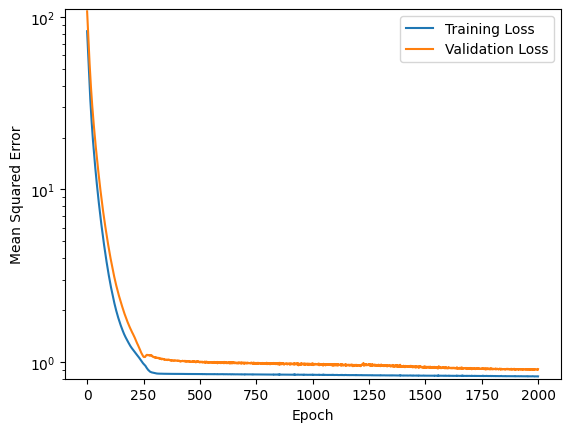


 Evaluate the new model against the test set:
4/4 [==============================] - 0s 2ms/step - loss: 0.7975 - mean_squared_error: 0.7975


{'loss': 0.7975153923034668, 'mean_squared_error': 0.7975153923034668}

In [82]:
# The following variables are the hyperparameters.
learning_rate = 0.00003
epochs = 2000
batch_size = 15
l2_regularization = 1
patience = 70

# Specify the label
label_name = "BodyFat"

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.2

dnn_outputs = get_outputs_dnn()

# Establish the model's topography.
my_model = create_model(
    inputs,
    dnn_outputs,
    learning_rate, l2_regularization)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined in our inputs.
epochs, mse, history = train_model(my_model, trainDF, epochs,
                                   batch_size, label_name, patience, validation_split)
plot_the_loss_curve(epochs, mse, history["val_mean_squared_error"])

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in testDF.items()}
test_label = test_bodyfat_normalized(np.array(test_features.pop(label_name))) # isolate the label

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, return_dict=True)

In [77]:
#Output weights
input_layer = my_model.layers[15]
weights, biases = input_layer.get_weights()

weights_table = pd.DataFrame(columns=['Feature', 'Total Weight'])

for feature, i in zip(inputs, weights):
    for j in i:
        j = abs(j)
        if feature not in weights_table['Feature'].values:
            row = pd.DataFrame({'Feature': feature, 'Total Weight': j}, index=[0])
            weights_table = pd.concat([weights_table, row], ignore_index=True)
        else:
            condition = weights_table['Feature'] == feature
            index = weights_table.loc[condition, 'Total Weight'].index
            weights_table.loc[condition, 'Total Weight'] = weights_table.loc[condition, 'Total Weight'][index] + j

weights_table = weights_table.sort_values(by='Total Weight', ascending=False)
weights_table


,Feature,Total Weight
4,HipThighRatio,3.86
1,BMI,3.71
7,ForearmBicepRatio,3.46
11,Forearm,3.42
13,StaticWaistRatio,3.31
6,ForearmWristRatio,3.28
0,Age,3.04
3,ChestWaistRatio,2.83
5,Neck,2.71
12,Wrist,2.70


In [78]:
# Create an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['Row', 'Predicted Body Fat', 'Correct Body Fat', 'Difference +-'])

# Get the mean and variance from the normalization layer
mean = train_bodyfat_normalized.mean.numpy()
variance = train_bodyfat_normalized.variance.numpy()

# Get the minimum and maximum values of the original body fat data
min_value = trainDF['BodyFat'].min()
max_value = trainDF['BodyFat'].max()

# Iterate over the rows of the test dataframe
for index, row in testDF.iterrows():
    test_features = {name: np.array([value]) for name, value in row.items() if name != 'BodyFat'}

    # Get the correct label for the current row
    correct_label = np.array([row['BodyFat']])
    correct_label_normalized = (correct_label - mean) / np.sqrt(variance)

    # Make predictions using the model
    predictions = my_model.predict(test_features, verbose=0)

    predicted_bodyfat_normalized = predictions['dense_output'][0][0]
    predicted_bodyfat = (predicted_bodyfat_normalized * np.sqrt(variance)) + mean
    predicted_bodyfat = np.round(predicted_bodyfat, decimals=1)

    actual_bodyfat = np.round((correct_label_normalized * np.sqrt(variance)) + mean, decimals=1)
    difference = np.round(predicted_bodyfat - actual_bodyfat, 1)
    row_data = pd.DataFrame({'Row': [index],
                             'Predicted Body Fat': [predicted_bodyfat],
                             'Correct Body Fat': [actual_bodyfat],
                             'Difference +-': [difference]})

    # Concatenate the row DataFrame to the result_table
    result_table = pd.concat([result_table, row_data], ignore_index=True)

pd.options.display.max_rows = 100
result_table

,Row,Predicted Body Fat,Correct Body Fat,Difference +-
0,164,[19.5],[27.3],[-7.8]
1,66,[19.5],[21.5],[-2.0]
2,180,[19.5],[26.6],[-7.1]
3,148,[19.5],[5.3],[14.2]
4,0,[19.5],[12.3],[7.2]
5,120,[19.5],[27.9],[-8.4]
6,49,[19.5],[4.0],[15.5]
7,127,[19.5],[17.4],[2.1]
8,219,[19.5],[15.0],[4.5]
9,189,[19.5],[24.4],[-4.9]
